In [33]:
import os
import sys
import random
import torch
import torch.nn as nn
import torchvision.transforms as TF

import matplotlib.pyplot as plt

In [34]:
home = os.path.abspath('../')
if home not in sys.path:
    sys.path.append(home)

In [35]:
from datasets.wafer import LabeledWM811kFolder
from datasets.transforms import BasicTransform, RotationTransform, CropTransform, CropRotationTransform

In [36]:
SIZE = (56, 56)

In [37]:
DATA_FOLDER = '../data/images/labeled/test/'

In [57]:
ds_basic = LabeledWM811kFolder(root=DATA_FOLDER, transform=BasicTransform.get(size=SIZE))
ds_crop = LabeledWM811kFolder(root=DATA_FOLDER, transform=CropTransform.get(size=SIZE))
ds_rotation = LabeledWM811kFolder(root=DATA_FOLDER, transform=RotationTransform.get(size=SIZE))
ds_crop_rotate = LabeledWM811kFolder(root=DATA_FOLDER, transform=CropRotationTransform.get(size=SIZE))

In [58]:
def plot_transforms(*datasets, indices: list, names: list = None):
    
    subplot_kwargs = dict(
        nrows=len(indices),
        ncols=len(datasets),
        figsize=(5 * len(datasets), 5 * len(indices))
    )
    fig, axes = plt.subplots(**subplot_kwargs)
    
    for i, axr in zip(indices, axes):
        for j, dset in enumerate(datasets):
            img = dset[i]['x'].squeeze(0).numpy()
            mask = dset[i]['m'].squeeze(0).numpy()
            img = (img + mask) / 2
            axr[j].imshow(img, cmap=plt.cm.binary)
            if names is not None:
                assert len(names) == len(datasets)
                axr[j].set_title(names[j])
    
    plt.show(fig)

In [59]:
INDICES = [random.randrange(0, len(ds_basic)) for _ in range(10)]

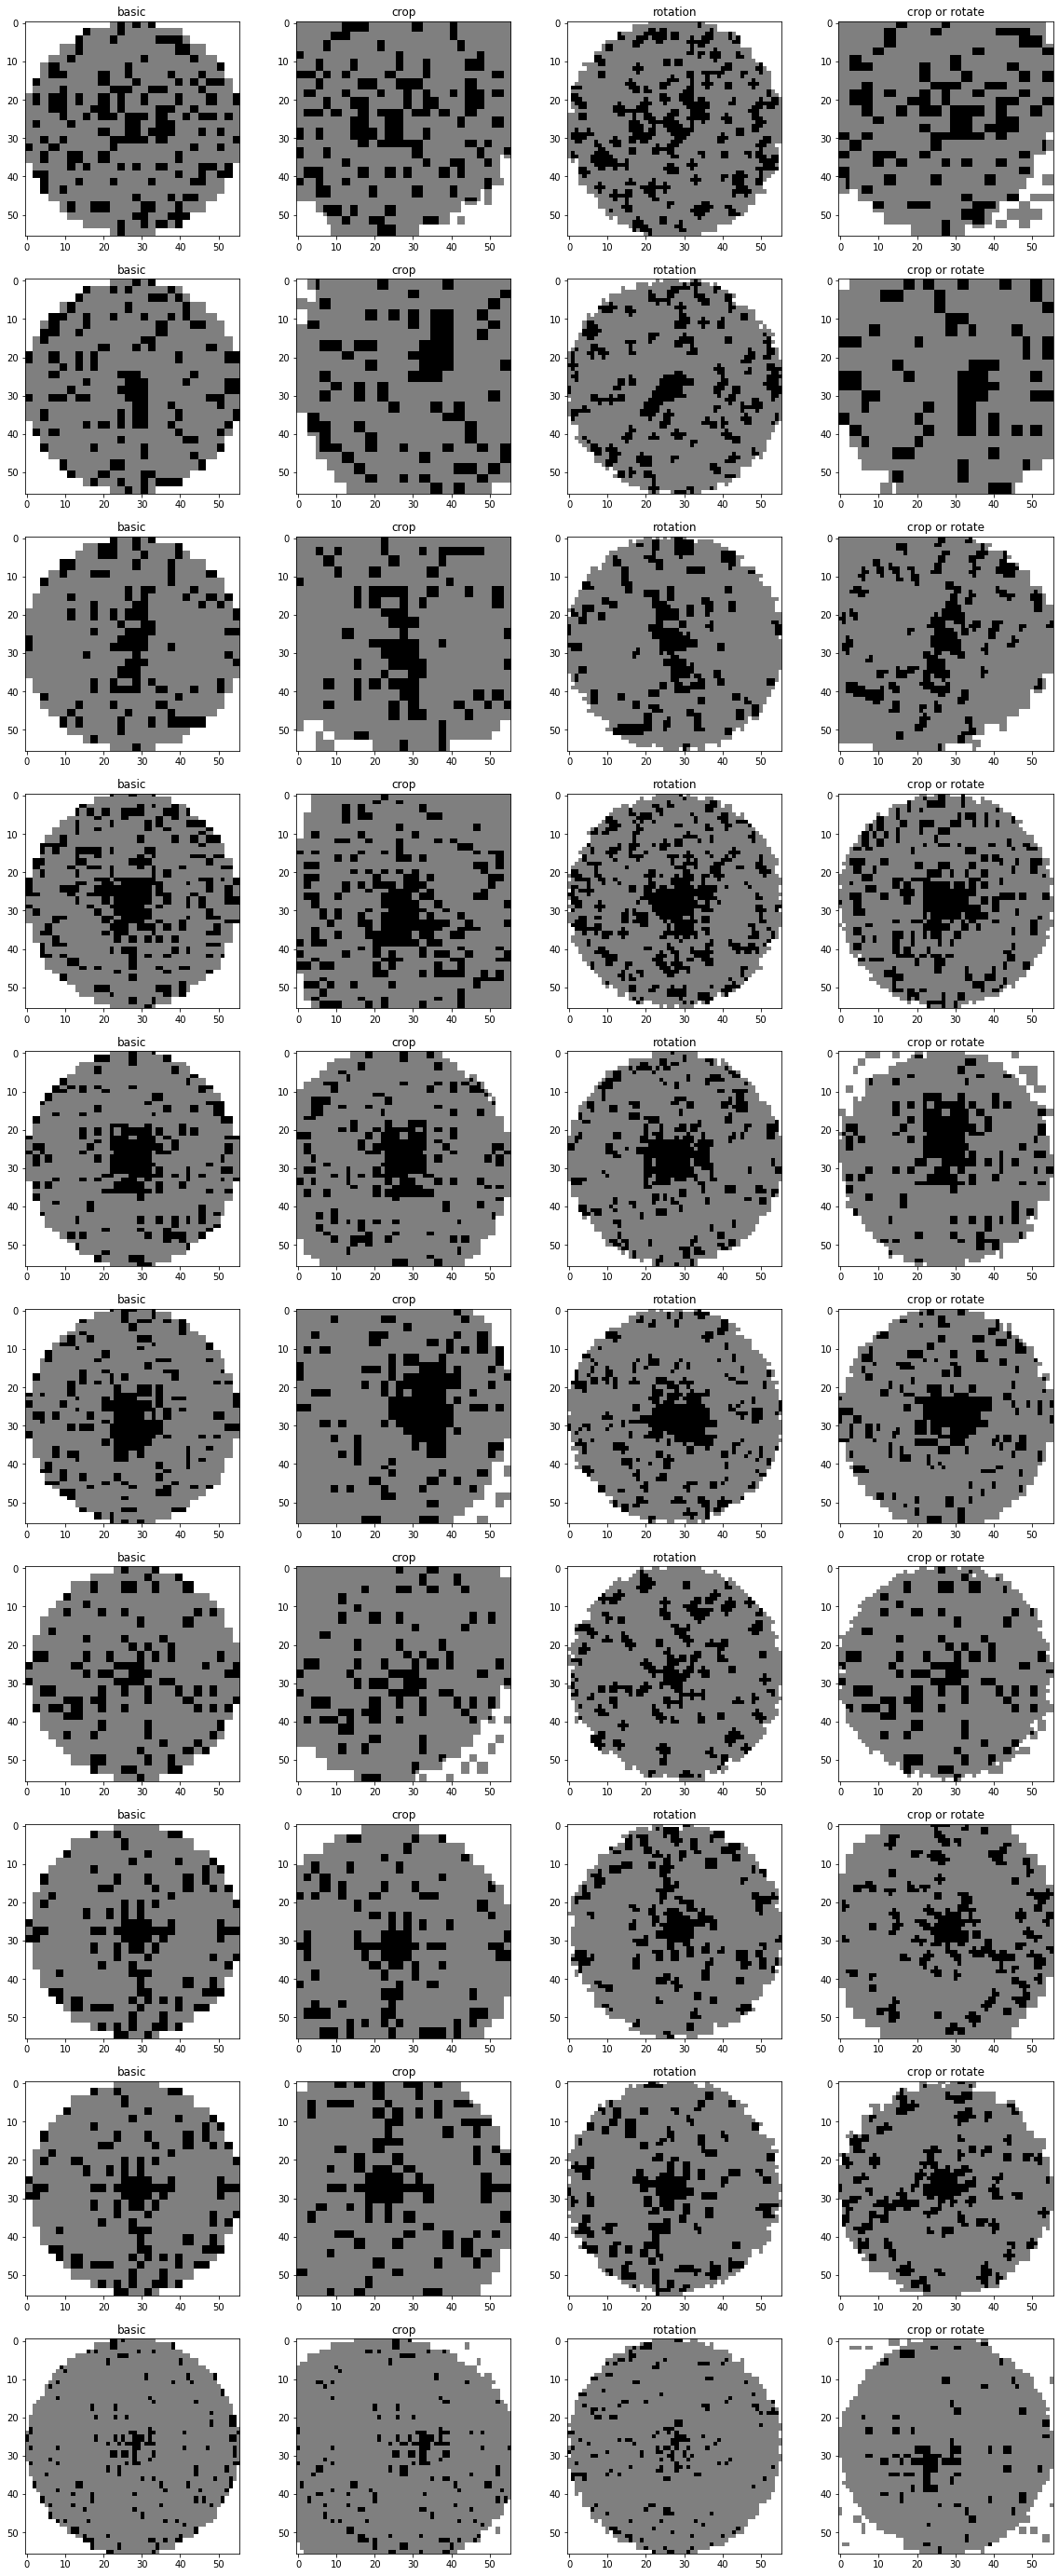

In [60]:
plot_transforms(*[ds_basic, ds_crop, ds_rotation, ds_crop_rotate], indices=list(range(10)), names=['basic', 'crop', 'rotation', 'crop or rotate'])